# Lien entre la base souscription et la base le furet

- Code Original : Marouan 
- Code original pour lecture Le Furet : Clémentine
- Révisé : Guillaume Gorge 2/5/23




## 1. Initialisation Phase


In [1]:
# variables indiquant si on relit ou non toute la base

# generation_source = 'Aggregator' 'Portal'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime 
import math
from plotly import graph_objects as go
import json 
import seaborn as sns
import pandas_profiling
import sys


C:\Users\guill\AppData\Local\Temp\ipykernel_33784\52057984.py:9: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [43]:
## Python directory
### <--------------------------- TO BE CHANGED ---------------------------> ### 
PYTHON_DIRECTORY = 'https://github.com/ornikar/pricing-insurance/Shared Notebooks'
PYTHON_DIRECTORY = 'C:/Users/guill/GitHub/2023 Ornikar Pricing/pricing-insurance/Python Official Library/'

LATEX_MAIN_DIRECTORY = 'C:/Users/guill/GitHub/2023 Ornikar Result/OrnikarInsuranceAutomaticResults/'
LATEX_DIRECTORY = 'C:/Users/guill/GitHub/2023 Ornikar Result/OrnikarInsuranceAutomaticResults/Dashboard_Latex/'

RESULTS_DIRECTORY = 'C:/Users/guill/GitHub/2023 Ornikar Result/Results/'
### <--------------------------- TO BE CHANGED ---------------------------> ### 


sys.path.insert(1, PYTHON_DIRECTORY)


from importlib import reload  # Python 3.4+
import OrnikarDataFormat
import TransformedDataReading
import LinkQuotations
import LeFuretLibrary
import GraphicStatLibrary

# instruction pour forcer la relecture d'une base (utile quand on code ;) 
# LeFuretLibrary = reload(LeFuretLibrary)
# GraphicStatLibrary = reload(GraphicStatLibrary)


In [5]:
# Définition du mode de lecture / écriture des base : 
ModeGlobal = True # True or False : True pour tout lire
ModeSpeed = 'Full' # 'Full' means to keep all variables at the expense of Speed. Put 'Quick' instead
periodLeFuret =  '2023-03' # mois le Furet à lire
if ModeGlobal and ModeSpeed == 'Full':
    print("Full reading of BigQuery and all DataBases")
    mode = 'Google' 
    SizeVariablesKeptGW = 'Full' # We keep all the variables of GW except var_to_suppress.
elif ModeGlobal:
    print("Fast Mode through limited selection of variables - good for Clementine")
    mode = 'Google' 
    SizeVariablesKeptGW = 'Quick' # We keep all the variables of GW except var_to_suppress.
else: 
    mode = 'ReadLocalBase'
    SizeVariablesKeptGW = 'Full'


Full reading of BigQuery and all DataBases


In [44]:

# Import the data base

### <--------------------------- TO BE CHANGED ---------------------------> ### 
BASE_PATH = 'C:/Users/guill/GitHub/2023 Ornikar Empreinte/Data' 
BASE_PATH_LEFURET = 'C:/Users/guill/GitHub/2023 Coherence Tarifaire/Data' 
BASE_PATH_RES = RESULTS_DIRECTORY
### <--------------------------- TO BE CHANGED ---------------------------> ### 


In [7]:
## Variables to Keep Guidewire

# Liste Clémentine
var_process = ['account_id',  'account_number', 'submission_created_at', 'bind_date',  'job_id',  'job_number', 'policy_id',  'policy_number', 'tariff_viewed', 'wakam_called', 'tariff_accepted', 'wakam_pricing_version',
                'generation_source', 'online_offline' ,'ph_email']
var_risk = ['ph_email', 'loss_history_type', 'recommended_package', 'package_subtype', 'md_age', 'md_license_duration', 'vh_age',  'md_prefix',  'md_crm_coefficient', 'md_license_country', 'vh_sra_code', 'vh_license_plate','vh_annual_km','PACKAGE', ]  
# if SizeVariablesKeptGW = 'Full' alors à ces variables sont ajoutées TOUTES les variables sauf var_to_suppress
var_to_suppress = ['vh_sra_code','Unnamed: 0', 'insurer_name','submission_creation_user_name','update_user_id','ph_first_name','ph_last_name','ph_email','ph_phone'
] # vh_sra_code est en doublon

# Liste Guillaume 
var_process = ['account_id',  'account_number', 'submission_created_at', 'bind_date',  'job_id',  'job_number', 'policy_id',  'policy_number', 'tariff_viewed', 'wakam_called', 'tariff_accepted', 'policy_status', 'wakam_pricing_version',
                'generation_source', 'online_offline','ph_email' ]
var_risk = [ 'loss_history_type', 'recommended_package', 'package_subtype', 'md_age', 'md_license_duration', 'vh_age',  'md_prefix',  'md_crm_coefficient', 'md_license_country', 'vh_sra_code', 'vh_license_plate','vh_annual_km','PACKAGE', ]  

# suppression 'ph_gender' et remplacement par md_prefix

var_premium = ['total_premium_rpt','total_cost_rpt']


In [8]:
# Variable to Keep LeFuret

columnstoKeep = ['IdClient', 'SRA_Groupe', 'SRA_Classe', 'VEH_Antecedent',
       'premium_TTC', 'premium_HT', 'premium_RCC_TTC', 'premium_RCM_TTC',
       'premium_DRX_TTC', 'premium_PROPIL_TTC', 'premium_BDG_TTC',
       'premium_VLX_TTC', 'premium_INC_TTC', 'premium_CATNAT_TTC',
       'premium_CATECH_TTC', 'premium_EVCLM_TTC', 'premium_DOM_TTC', 'PP_RC',
       'PP_VOL', 'PP_INC', 'PP_BDG', 'PP_DOM', 'PP_SDC','message','ph_email']



columnstoKeepSmall = [ 'IdClient',
       'premium_TTC', 'premium_HT', 'premium_RCC_TTC', 'premium_RCM_TTC',
       'premium_DRX_TTC', 'premium_PROPIL_TTC', 'premium_BDG_TTC',
       'premium_VLX_TTC', 'premium_INC_TTC', 'premium_CATNAT_TTC',
       'premium_CATECH_TTC', 'premium_EVCLM_TTC', 'premium_DOM_TTC','message']

columnstoKeepSmall =['IdClient','premium_TTC','premium_HT','PP_RC','PP_VOL', 'PP_INC', 'PP_BDG', 'PP_DOM', 'PP_SDC','message'] 
# La prime Furet est TTC, premium HT est conservée pour le S/C

columnsPremium = ['premium_TTC', 'premium_HT', 'premium_RCC_TTC', 'premium_RCM_TTC',
       'premium_DRX_TTC', 'premium_PROPIL_TTC', 'premium_BDG_TTC',
       'premium_VLX_TTC', 'premium_INC_TTC', 'premium_CATNAT_TTC',
       'premium_CATECH_TTC', 'premium_EVCLM_TTC', 'premium_DOM_TTC','message']
columnsPremiumRC = [c+'_RC' for c in columnsPremium]
columnsPremiumRCP = [c+'_RCP' for c in columnsPremium]
columnsPremiumTR = [c+'_TR' for c in columnsPremium]

In [9]:
# Base le Furet méthode 2 : description automatique et suppression des variables non pertinentes.
# voir méthode que l'on retient au final

# Attention, clémentine, pour toi, faire un filtre sur [['custom_qr_id', 'couverture_demandée', 'mediane', 'annee_naissance', 'segment']]
featureLF_a_conserver = [['custom_qr_id', 'couverture_demandée', 'mediane', 'segment','md_age']] 

features_a_supprimer =['custom_qr_id','Unnamed: 0','Unnamed: 0.1','assureur','id','mediane', 'moyenne', 'position_vue', 'prix', 'id_externe_tarif', 'couverture','custom_offer_id',
                       'DTA_Incluse',	'DTA_Franchise_Montant',	'VI_Incluse',	'VI_Franchise_Montant',	'BDG_Incluse',	'BDG_Franchise_Montant',	'ASS_Panne_Incluse',	'ASS_Panne_Franchise_Montant',	'ASS_Accident_Incluse',	'ASS_Accident_Franchise_Montant',	'VR_Accident_Incluse',	'GC_Incluse',
                     	'custom_offer_id','PositionMediane','Position5HorsMediane','position_mer','devis','rappel','souscription']  
# un certain nombre de variables buguent car plusieurs formats. On les enlève dans un premier temps
# ! TODO il faudra essayer de les reintégrer
features_trop_large = ['code_postal','code_postal_travail','auto_sec_his_assure_actuel',
                       'auto_veh_tra_france','auto_pri_inf_conjoint_permis','auto_pri_inf_conjoint_autre_veh','auto_pri_his_sin_1_tiers','auto_pri_his_sin_2_tiers',
                       'auto_pri_his_sin_3_tiers','auto_pri_his_sin_4_tiers','auto_pri_his_sin_5_tiers',
                       'auto_pri_his_sin_corp_1_enquete','auto_pri_his_sin_corp_2_enquete','auto_pri_his_sin_corp_3_enquete','auto_pri_his_sin_corp_4_enquete','auto_pri_his_sin_corp_5_enquete',' ',
                       'auto_pri_his_sin_corp_1_prison', 'auto_pri_his_sin_corp_1_prison', 'auto_pri_his_sin_corp_2_prison','auto_pri_his_sin_corp_3_prison','auto_pri_his_sin_corp_4_prison','auto_pri_his_sin_corp_5_prison',
                       'auto_ass_dtl_souscription']
# auto_veh_garage_nt_departement_value était avant enlevé


In [10]:
### Variable Wakam
# Faire le Tri
VariableSRAWakam= ['SRA_CodeEnergie	SRA_PtacENkg','SRA_PuissanceReelleMaxiCEE',	'VEH_RatioWeightPower',	'SRA_Suspension	SRA_Alimentation',	'SRA_VitesseMaxi',	'SRA_TypeFreins',	'SRA_Carrosserie',	'VEH_Carrosserie_FOCUS',	'SRA_Transmission',	'SRA_NombrePlaces',	'SRA_ClasseReparationActuelle']
VariableSRAWakam= ['SRA_PuissanceReelleMaxiCEE','VEH_RatioWeightPower']



In [11]:
#Table de référence pour les libellés correspondant à une couverture donnée
var = {
    "libelle_import": ["RC", "RC+", "TR"], 
    "sexy_title": ["1. Tiers", "2. Tiers Etendue", "3. Tous Risques"],
    "2023-02" : ['All_Quote_Priced_02_2023_RC','All_Quote_Priced_02_2023_RC+','All_Quote_Priced_02_2023_TR'],
    "2023-03" : ['All_Quotes_RC_03_2023','All_Quotes_RC+_03_2023','All_Quotes_TR_03_2023'],
    }

couverture = ["tiers", "vol_incendie", "tous_risques"]
dico_couv = pd.DataFrame(var, index = couverture)
dico_couv

,libelle_import,sexy_title,2023-02,2023-03
tiers,RC,1. Tiers,All_Quote_Priced_02_2023_RC,All_Quotes_RC_03_2023
vol_incendie,RC+,2. Tiers Etendue,All_Quote_Priced_02_2023_RC+,All_Quotes_RC+_03_2023
tous_risques,TR,3. Tous Risques,All_Quote_Priced_02_2023_TR,All_Quotes_TR_03_2023


## 2. Reading DataBases

In [12]:
## Read either data base located on the computer (mode = 'ReadLocalBase') or through Google Big Query directly with the update of local data base (option = "Google")

df, df_previous_claims, df_previous_insurers, df_previous_terminations, df_previous_license_cancellations_suspensions  = TransformedDataReading.GoogleAllDataBaseReading(mode=mode, BASE_PATH =BASE_PATH)
#df, df_previous_claims, df_previous_insurers, df_previous_terminations, df_previous_license_cancellations_suspensions  = TransformedDataReading.GoogleAllDataBaseReading(mode='Google', BASE_PATH =BASE_PATH)

c:\Users\guill\anaconda3\envs\OnlyPIP\lib\site-packages\google\auth\_default.py:78: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. See the following page for troubleshooting: https://cloud.google.com/docs/authentication/adc-troubleshooting/user-creds. 
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


c:\Users\guill\anaconda3\envs\OnlyPIP\lib\site-packages\google\auth\_default.py:78: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. See the following page for troubleshooting: https://cloud.google.com/docs/authentication/adc-troubleshooting/user-creds. 
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)
c:\Users\guill\anaconda3\envs\OnlyPIP\lib\site-packages\google\auth\_default.py:78: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. See the following page for troubleshooting: https://cloud.google.com/docs/authentication/adc-troubleshooting/user-creds. 
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)
c:\Users\guill\anaconda3\envs\OnlyPIP\lib\site-packages\google\auth\_default.py:78: UserWarning: Your application has 

In [13]:
# Formatting Data 
OrnikarDataFormat = reload(OrnikarDataFormat)
dfFormat = OrnikarDataFormat.FormatGuideWire(df)
print('Number of policies UW : '+str(dfFormat['tariff_accepted'].sum()))


['submission_created_at', 'job_close_date', 'bind_date', 'issue_date', 'cancellation_date', 'original_effective_date', 'period_start', 'period_end', 'creation_date', 'update_date', 'price_computed_at', 'written_date', 'policy_period_start', 'policy_period_end']
Number of policies UW : 2207


In [14]:
# Definition de var_other qui contient toutes les variables qui n'ont pas été explicitement rejetées dans var_suppress
from itertools import chain
var_other = [col for col in dfFormat.columns if col not in list(chain(var_process, var_risk, var_premium ,var_to_suppress,['account_id', 'submission_created_at']))  ]
for col in var_other:
    if col == 'vh_sra_code':print('probleme')
    if col == 'account_id':print('problème')
    if col == 'md_license_country':print(col)
print('liste var_others')
print(var_other)

liste var_others
['policy_period_public_id', 'policy_public_id', 'sf_external_contact_id', 'policy_term_public_id', 'wakam_quote_id', 'wakam_price_test', 'wakam_price_test_perc_applied', 'job_type', 'job_public_id', 'job_close_date', 'issue_date', 'cancellation_date', 'cancellation_nature', 'sf_submission_id', 'sf_opportunity_id', 'original_effective_date', 'period_start', 'period_end', 'period_id', 'creation_date', 'update_date', 'price_computed_at', 'last_policy_period_id', 'product_code', 'policy_term_id', 'risk_type', 'written_date', 'submission_creation_user_id', 'submission_creation_user_email', 'is_from_aggregator', 'is_anonymous', 'session_id', 'utm_source', 'utm_medium', 'utm_campaign', 'utm_term', 'utm_content', 'policy_risk_profile', 'policy_risk_profile_edu', 'has_formulas', 'has_selected_formula', 'account_public_id', 'ph_prefix', 'ph_birthdate', 'md_property_owner_type', 'md_accommodation_type', 'phc_policy_contact_role_public_id', 'phc_sf_external_contact_id', 'md_driver

In [15]:
# Suppression des doublons et conservation uniquement des variables d'intérêt
''' sortOrder = [True,True] : choose the first quote of a specific account; [True,False] : the last one ''' 
TransformedDataReading = reload(TransformedDataReading)

subf=TransformedDataReading.UniqueRow(dfFormat,sortOrder = [True, True], var_process = var_process,
            var_risk = var_risk ,       
            var_premium = var_premium,var_other = var_other, size = SizeVariablesKeptGW)
 

Suppression of Doublons 
Il existe 177330 lignes avant dédoublonnage
Il existe 153371 lignes lorsqu'on dédoublonne par account_id


In [16]:
# Base SRA
df_SRA = pd.read_csv(f'{BASE_PATH}/Wakam_vehiculier_auto 04-2023 (dwld PlugPlay).csv', sep=';',low_memory=False)
# On récupère les 3 variables SRA manquantes (classe, poids véhicule vide, puissance DIN)
df_SRA = df_SRA[['SRAIdentifiant','Classe','PoidsASec','PuissanceReelleMaxiDINenCv']]
# Ajout de variables comme le vehicule Ratio
df_SRA = OrnikarDataFormat.FormatSRA(df_SRA,Stat=False)

In [17]:
#pandas_profiling.ProfileReport(subf, minimal=True)

In [18]:
# Merge of all the Databases of GuideWire into a unique One
OrnikarDataFormat = reload(OrnikarDataFormat)
#display(df,df_SRA,df_previous_claims,df_previous_insurers,df_previous_terminations,df_previous_license_cancellations_suspensions) 
BaseQuotation = OrnikarDataFormat.mergeBaseGuideWire(dfFormat,df_SRA,df_previous_claims,df_previous_insurers,df_previous_terminations,df_previous_license_cancellations_suspensions,Stat=True)
print('Number of policies UW : '+str(BaseQuotation['tariff_accepted'].sum()))
#pandas_profiling.ProfileReport(BaseQuotation, minimal=True)
BaseQuotation = OrnikarDataFormat.FormatGuideWire(BaseQuotation)
print('Number of policies UW : '+str(BaseQuotation['tariff_accepted'].sum()))

segment marketing


,segment
3. Standard,99368
2. Jeune permis - > 21 ans,30405
4. Sans Antécédent,20781
1. Jeune permis - 18-21 ans,20563
5. Aggravé (CRM > 100),5820
<NA>,392


segment Reinsurer


,ReinsurerSegment
3. Standard,99368
2. Young Driver with No EduScore,38010
4. Interrupted,20781
1b. Young Driver with EduScore (bad),6785
1a. Young Driver with EduScore (Good),6564
3b. Standard - poor CRM,3362
2b.Young Driver - poor CRM,2099
4b. Interrupted - poor CRM,359
<NA>,1


case with NA Segment 392


,segment,md_risk_profile,md_crm_coefficient,md_license_duration,duree_assurance_sur_3ans,md_edu_score,md_age
105,<NA>,Young Driver,1.0,0.0,0.000000,<NA>,17.0
2457,<NA>,Unknown,1.0,0.0,0.000000,89,17.0
3359,<NA>,Unknown,1.0,0.0,29.832235,<NA>,17.0
4426,<NA>,Unknown,1.0,0.0,0.000000,34,17.0
4490,<NA>,Unknown,1.0,0.0,0.000000,16,17.0
...,...,...,...,...,...,...,...
171196,<NA>,Unknown,1.0,0.0,8.969383,<NA>,17.0
173487,<NA>,Unknown,1.0,0.0,32.953449,<NA>,17.0
173850,<NA>,Unknown,1.0,0.0,35.976098,<NA>,17.0
175824,<NA>,Unknown,1.0,0.0,11.992033,<NA>,17.0


case with NA ReinsurerSegment


,ReinsurerSegment,md_risk_profile,md_crm_coefficient,md_license_duration,duree_assurance_sur_3ans,md_edu_score
110752,<NA>,Unknown,NaN,9.0,35.976098,<NA>


Output Database with 177329 lines and 208 Columns
Number of policies UW : 2207
['cancellation_date', 'submission_created_at_Timestamp']
Number of policies UW : 2207


In [19]:
# Indicatrices - Règles GW 
OrnikarDataFormat = reload(OrnikarDataFormat)
BaseQuotation = OrnikarDataFormat.IndicatorsUnderwritingRules(df_temp=BaseQuotation,Stat = True)
print('Number of policies UW : '+str(BaseQuotation['tariff_accepted'].sum()))


Profil Original Guidewire


0
policy_risk_profile         is_JEUNE is_STANDARD is_SANS_ANTECEDENT       
Standard                    False    True        False               82861
Young Driver                True     False       False               40939
No Previous Insurance       False    False       True                16402
Unknown                     True     False       False                9464
                            False    False       False                8327
                                     True        False                8037
                                     False       True                 3475
Standard                    False    False       True                 3189
Aggravated Not Paid Premium False    False       False                2748
Aggravated Malicious        False    False       False                1200
No Previous Insurance       False    True        False                 371
Standard                    False    False       False                 248
Young Driver                False    False       False                  17
Aggravated Alcohol or Drugs False    False       False                  17
Standard                    True     False       False                  14
No Previous Insurance       False    False       False                  13
                            True     False       False                   7

Number of policies UW : 2207


In [20]:
#display(dfFormatLL[(dfFormatLL['prospect_id_trail'] == 861)])
#display(dfFormatLL[['is_from_aggregator','prospect_id','submission_created_at']][(dfFormatLL['prospect_id']=='1981-05-24_CHEVROLET_CRUZE_09120')])*



# Identification of policy coming from aggregator 

OrnikarDataFormat = reload(OrnikarDataFormat)
dfFormatLL = OrnikarDataFormat.LinkLeLynx(df=BaseQuotation,Stat=True,BASE_PATH_RES=BASE_PATH_RES)

#dfFormatLL = OrnikarDataFormat.LinkLeLynx(df=BaseQuotation[(BaseQuotation['segment']=='1. Jeune permis - 18-21 ans')],Stat=True,BASE_PATH_RES=BASE_PATH_RES)
#display(dfFormatLL[['prospect_id','ph_email','is_anonymous']][(dfFormatLL['prospect_id']=='1996-08-05_FIAT_500_31700')&(dfFormatLL['is_not_anonymous']==True)])
#display(dfFormatLL[['prospect_id','vh_notyet_bought','is_from_aggregator','is_anonymous','has_been_on_Ornikarsite','is_bound','session_id','ph_email','is_anonymous']][(dfFormatLL['prospect_id']=='1981-05-24_CHEVROLET_CRUZE_09120')&(dfFormatLL['is_anonymous']==False)])



#dfFormatLL['clicked'] = (dfFormatLL['session_id'].notna())
#dfFormatLL['is_bound'] = (dfFormatLL['period_status']=='Bound')
#display(dfFormatLL['vh_notyet_bought'].value_counts(dropna=False))



(177329, 287)

(177078, 291)

,prospect_id,counts
0,1981-05-24_CHEVROLET_CRUZE_09120,1006
1,1946-01-01_CITROEN_C5 II TOURER_45000,557
2,1974-10-03_RENAULT_CLIO IV_39300,428
3,1980-11-12_PEUGEOT_308_31820,389
4,1988-10-14_OPEL_AGILA_44640,317
...,...,...
110012,2003-04-25_MERCEDES_CLASSE C_38090,1
110013,1983-10-07_MERCEDES_CLASSE C_21000,1
110014,1969-09-28_MERCEDES_CLASSE C_40000,1
110015,1995-01-16_MERCEDES_CLASSE C_38100,1


TotalNumber of Quote Submissions that are done by competition for Pricing Watch : 8674


In [21]:
dfStat = dfFormatLL[['prospect_id','vh_notyet_bought','is_from_aggregator','is_anonymous','is_not_anonymous','is_bound']].groupby(by = ['prospect_id'],as_index=False).agg(vh_notyet_bought=('vh_notyet_bought', max), is_from_aggregator=('is_from_aggregator', 'max'), has_been_on_aggregator=('is_anonymous', 'max'),
                                                                                                                                                                  has_been_on_Ornikarsite=('is_not_anonymous', 'max'),
                                                                                                                                                                   is_bound=('is_bound', 'max'),SubmissionNbr=('is_bound', 'count'))
#display(dfStat.sort_values(by=['SubmissionNbr'], ascending = False))
#display(dfStat[(dfStat['has_been_on_Ornikarsite'] == 1)&(dfStat['has_been_on_aggregator'] == 1)].sort_values(by=['SubmissionNbr'], ascending = False))

Stat = pd.DataFrame(dfStat[['is_from_aggregator','has_been_on_aggregator','vh_notyet_bought','has_been_on_Ornikarsite','is_bound']].value_counts(dropna=False).reset_index(name='counts'), index=None)
display(Stat)


,is_from_aggregator,has_been_on_aggregator,vh_notyet_bought,has_been_on_Ornikarsite,is_bound,counts
0,True,True,False,False,False,45622
1,False,False,False,True,False,32529
2,True,True,True,False,False,19962
3,False,False,True,True,False,6265
4,True,True,False,True,False,2617
5,False,False,False,True,True,1832
6,True,True,True,True,False,770
7,True,True,False,True,True,212
8,False,False,True,True,True,93
9,True,False,False,True,False,61


### 2.2 Statistique sur la souscription et sortie Latex

In [57]:
                     
# A ajouter : ReinsurerSegment
# segemnts avec faible NbreQuote
# ['prospect_id_trail']
def UWAnalysis(df, date="2023-06-20",Stat=True):

    # Creation of Date, a variable comparing last day result with previous week and since the beginning
    dateJour = pd.to_datetime(date)
    dateWeek = dateJour - np.timedelta64(7, 'D')
    print(dateWeek)
    
    df['Date'] = '3. > 1 week'
    df['Date'] = df['Date'].mask(df['submission_created_at'] > (dateWeek),"2. W Week")
    df['Date'] = df['Date'].mask(df['submission_created_at'] == dateJour,"1. D day")
    df['Date'] = df['Date'].mask(df['submission_created_at'] > dateJour,"0. Post D day")

    print('There are UW after D Day : '+str(df[['Date']][(df['Date']== "0. Post D day")].count()))
    
    df = df[~(df['Date']== "0. Post D day")]

    if Stat: display(df[['Date']].value_counts())

    for variable in ['wakam_called','tariff_viewed','tariff_accepted']:
        Newvariable = variable+'_dedouble'
        Totalvariable = variable+'_Total'
        df = df.merge(df.groupby(by=['prospect_id']).agg(Total=pd.NamedAgg(column=variable, aggfunc="sum")), how='left', on ='prospect_id')
        df[Newvariable] = df[variable] / df['Total']
        df[Newvariable] = df[Newvariable].fillna(value=0)
        #display(df[['prospect_id',variable,Newvariable,'Total','Date']].head(5))
        df = df.drop(columns='Total')


    VariableProcess = ['vh_notyet_bought','is_dpt_13','is_dpt_93','is_dpt_Monaco']
    VariableStandard = ['is_STANDARD']
    VariableInterrupted = ['is_SANS_ANTECEDENT','is_date_derniere_ass_inf_strict_7','is_date_derniere_ass_inf_30','is_date_derniere_ass_sup_30','is_histo_assurance_0_35mois','is_histo_assurance_sup_9mois','is_histo_assurance_inf_9mois']
    VariableAge = ['is_JEUNE','is_vehicle_ratio_2125_8.5','is_vehicle_ratio_2530_7.5','is_vehicle_ratio_2530_7']
    VariableRAG =['is_RAG_ALCOOL','is_RAG_MALUS','is_RAG_NPP','is_RAG','is_sup_2_claims']
    CategoryVariableAnalysis = [[VariableProcess,VariableStandard,VariableInterrupted,VariableAge,VariableRAG]]

    ColKept = []
    for typevariable in CategoryVariableAnalysis:
        GrandTest = ()
        for variable in typevariable:
            ColKept= ColKept+variable
        
    print(ColKept)
    return df

dfFormatLL2 = UWAnalysis(df=dfFormatLL)

2023-06-13 00:00:00


C:\Users\guill\AppData\Local\Temp\ipykernel_33784\3392515331.py:12: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  df['Date'] = df['Date'].mask(df['submission_created_at'] > (dateWeek),"2. W Week")
C:\Users\guill\AppData\Local\Temp\ipykernel_33784\3392515331.py:13: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  df['Date'] = df['Date'].mask(df['submission_created_at'] == dateJour,"1. D day")
C:\Users\guill\AppData\Local\Temp\ipykernel_33784\3392515331.py:14: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future versi

There are UW after D Day : Date    563
dtype: int64


Date       
3. > 1 week    130865
2. W Week       37358
1. D day         8292
dtype: int64

['vh_notyet_bought', 'is_dpt_13', 'is_dpt_93', 'is_dpt_Monaco', 'is_STANDARD', 'is_SANS_ANTECEDENT', 'is_date_derniere_ass_inf_strict_7', 'is_date_derniere_ass_inf_30', 'is_date_derniere_ass_sup_30', 'is_histo_assurance_0_35mois', 'is_histo_assurance_sup_9mois', 'is_histo_assurance_inf_9mois', 'is_JEUNE', 'is_vehicle_ratio_2125_8.5', 'is_vehicle_ratio_2530_7.5', 'is_vehicle_ratio_2530_7', 'is_RAG_ALCOOL', 'is_RAG_MALUS', 'is_RAG_NPP', 'is_RAG', 'is_sup_2_claims']


In [58]:
def AnalysisbyAxis(df,axis,Variabletoanalyse,title = 'essai'):
    ''' 
    ['NbreQuote', 'PP_Ornikar', 'Top5_Wakam', 'ecart_euros_Bench1', 'prix_Ornikar_TTC_ya'] a rajouter si on travaille avec la base BaseQuotationavecFuret
    '''
    dfStat = pd.DataFrame(df.groupby(by=axis,dropna=False,as_index=False).agg(
                                                            # NbreQuoteOrnikar=pd.NamedAgg(column="prix_Ornikar_TTC_ya", aggfunc=np.count_nonzero),
                                                            # prix_Ornikar_TTC_ya=pd.NamedAgg(column="prix_Ornikar_TTC_ya", aggfunc="mean"),
                                                            SubmittedQuotationsNonDedouble =  pd.NamedAgg(column="wakam_called", aggfunc="count"),       #Wakam a été appelé
                                                            SubmittedQuotations =  pd.NamedAgg(column="wakam_called_dedouble", aggfunc="sum"),       #Wakam a été appelé
                                                            ViewedQuotations =  pd.NamedAgg(column="tariff_viewed_dedouble", aggfunc="sum"),       #Wakam a répondu positvement  
                                                            UWPolicies =  pd.NamedAgg(column="tariff_accepted", aggfunc="sum"),       #polices

                                                            #AxeACP1 = pd.NamedAgg(column="AxeACP1", aggfunc="mean"),
                                                            #AxeACP2 = pd.NamedAgg(column="AxeACP2", aggfunc="mean"),
                                                            #AxeACP3 = pd.NamedAgg(column="AxeACP3", aggfunc="mean"),
                                                            #AxeACP4 = pd.NamedAgg(column="AxeACP4", aggfunc="mean"),
                                                            ))
    

    Total = pd.DataFrame(dfStat.sum()).T
    Total[axis]='Total'
    dfStat = pd.DataFrame(pd.concat([dfStat,Total], axis=0).pivot(columns = axis).sum()).T
 
    #dfStat = dfStat.reset_index(drop=True)
    dfStat['Title'] = title.replace('_', ' ')
 
    
    return dfStat


BaseQuotationbyAxis= AnalysisbyAxis(df=dfFormatLL2,axis='Date',Variabletoanalyse=['md_crm_coefficient'])
#BaseQuotationavecFuretbyAxis= AnalysisbyAxis(df=BaseQuotationavecFuret,axis='WeekAkur8',Variabletoanalyse=['md_crm_coefficient'])
BaseQuotationbyAxis

                                         

SubmittedQuotationsNonDedouble                                \
Date                       1. D day 2. W Week 3. > 1 week   Total   
0                              8292     37358      130865  176515   

     SubmittedQuotations                                    ViewedQuotations  \
Date            1. D day     2. W Week 3. > 1 week    Total         1. D day   
0            3212.218576  12964.270024  44362.5114  60539.0      3193.767386   

                                        UWPolicies                        \
Date     2. W Week 3. > 1 week    Total   1. D day 2. W Week 3. > 1 week   
0     12965.346214  44612.8864  60772.0         42       266        1898   

            Title  
Date Total         
0     2206  essai

In [63]:
VariableProcess = ['vh_notyet_bought','is_dpt_13','is_dpt_93','is_dpt_Monaco']
VariableStandard = ['is_STANDARD','is_from_aggregator','is_histo_assurance_sup_9mois']
VariableInterrupted = ['is_SANS_ANTECEDENT','is_date_derniere_ass_inf_strict_7','is_date_derniere_ass_inf_30',
                       #'is_date_derniere_ass_sup_30',
                       'is_histo_assurance_0_35mois','is_histo_assurance_inf_9mois']

VariableAge = ['is_JEUNE','is_vehicle_ratio_2125_8.5',
               #'is_vehicle_ratio_2530_7.5',
               #'is_vehicle_ratio_2530_7'
               ]
VariableRAG =['is_RAG_ALCOOL','is_RAG_MALUS','is_RAG_NPP','is_RAG','is_sup_2_claims']


CategoryVariableAnalysis = [VariableProcess,VariableStandard,VariableInterrupted,VariableAge,VariableRAG]

print(CategoryVariableAnalysis)
BaseQuotationbyAxis= AnalysisbyAxis(df=dfFormatLL2,axis='Date',Variabletoanalyse=['md_crm_coefficient'],title = 'Total')
for index, typevariable in enumerate(CategoryVariableAnalysis):
    print(typevariable)
    dfFormatLL3 = dfFormatLL2[dfFormatLL2[typevariable].any(axis='columns')]
    BaseQuotationbyAxis= pd.concat([BaseQuotationbyAxis,AnalysisbyAxis(df=dfFormatLL3,axis='Date',Variabletoanalyse=['md_crm_coefficient'],title = str(index)+'. At least one below conditions')],axis=0)
    
    #[(Test)]
    for variable in typevariable:
        dfFormatLL3 = dfFormatLL2[dfFormatLL2[variable]]
        BaseQuotationbyAxis= pd.concat([BaseQuotationbyAxis,AnalysisbyAxis(df=dfFormatLL3,axis='Date',Variabletoanalyse=['md_crm_coefficient'],title = str(index)+'. '+variable)],axis=0)

    dfFormatLL3 = dfFormatLL2[~dfFormatLL2[typevariable].any(axis='columns')]
    BaseQuotationbyAxis= pd.concat([BaseQuotationbyAxis,AnalysisbyAxis(df=dfFormatLL3,axis='Date',Variabletoanalyse=['md_crm_coefficient'],title = str(index)+'. None above condition respected')],axis=0)
display(BaseQuotationbyAxis)


[['vh_notyet_bought', 'is_dpt_13', 'is_dpt_93', 'is_dpt_Monaco'], ['is_STANDARD', 'is_from_aggregator', 'is_histo_assurance_sup_9mois'], ['is_SANS_ANTECEDENT', 'is_date_derniere_ass_inf_strict_7', 'is_date_derniere_ass_inf_30', 'is_histo_assurance_0_35mois', 'is_histo_assurance_inf_9mois'], ['is_JEUNE', 'is_vehicle_ratio_2125_8.5'], ['is_RAG_ALCOOL', 'is_RAG_MALUS', 'is_RAG_NPP', 'is_RAG', 'is_sup_2_claims']]
['vh_notyet_bought', 'is_dpt_13', 'is_dpt_93', 'is_dpt_Monaco']
['is_STANDARD', 'is_from_aggregator', 'is_histo_assurance_sup_9mois']
['is_SANS_ANTECEDENT', 'is_date_derniere_ass_inf_strict_7', 'is_date_derniere_ass_inf_30', 'is_histo_assurance_0_35mois', 'is_histo_assurance_inf_9mois']
['is_JEUNE', 'is_vehicle_ratio_2125_8.5']
['is_RAG_ALCOOL', 'is_RAG_MALUS', 'is_RAG_NPP', 'is_RAG', 'is_sup_2_claims']


SubmittedQuotationsNonDedouble                                \
Date                       1. D day 2. W Week 3. > 1 week   Total   
0                              8292     37358      130865  176515   
0                              2661     12418       34261   49340   
0                              2184     10182       27845   40211   
0                               316      1630        3927    5873   
0                               298      1311        4223    5832   
0                               NaN       NaN         NaN     0.0   
0                              5631     24940       96604  127175   
0                              7627     34331       99468  141426   
0                              4944     21144       64723   90811   
0                              7097     31840       74061  112998   
0                              6005     26018       82113  114136   
0                               665      3027       31397   35089   
0                              8292     37358      130865  176515   
0                               805      4284       17813   22902   
0                              4028     16755       79120   99903   
0                              4067     16982       81452  102501   
0                              6377     27679       87748  121804   
0                              2287     11340       48752   62379   
0                               NaN       NaN         NaN     0.0   
0                              2458     11821       47602   61881   
0                              1926      9278       39064   50268   
0                              1008      4763       18710   24481   
0                              5834     25537       83263  114634   
0                               617      2652        9265   12534   
0                                37       175         356     568   
0                               442      1896        6569    8907   
0                               138       581        2340    3059   
0                               617      2652        9265   12534   
0                               120       576        1399    2095   
0                              7675     34706      121600  163981   

     SubmittedQuotations                                            \
Date            1. D day     2. W Week   3. > 1 week         Total   
0            3212.218576  12964.270024    44362.5114       60539.0   
0             928.122723    3793.97049  10611.496359  15333.589572   
0             928.122723    3793.97049  10610.996359  15333.089572   
0                    0.0           0.0           0.0           0.0   
0                    0.0           0.0           0.5           0.5   
0                    NaN           NaN           NaN           0.0   
0            2284.095853   9170.299533  33751.015041  45205.410428   
0            2944.129255  11752.513577  34261.967948  48958.610779   
0            2196.565217   8376.139793  25891.478523  36464.183533   
0            2733.512588  10765.570745  25295.682663  38794.765996   
0            2363.450546   9106.926166  28853.286582  40323.663295   
0             268.089322   1211.756446  10100.543452  11580.389221   
0            3212.218576  12964.270024    44362.5114       60539.0   
0             277.583613   1229.942533   5121.989052   6629.515198   
0            1856.449988   7197.653736  31879.210014  40933.313737   
0            1856.449988   7197.653736  31881.552871  40935.656594   
0            2499.631316   9619.694595  30548.767798  42668.093708   
0              848.76803   3857.343858  15509.224818  20215.336705   
0                    NaN           NaN           NaN           0.0   
0             903.036413   4121.813095  15749.607713  20774.457221   
0             737.669746   3357.312698    13341.4843  17436.466744   
0             347.105276   1581.116354   5781.258762   7709.480392   
0            2309.182164   8842.456929  28612.903687  39764.542779   
0                    0.4         0.875      7.

In [60]:
BaseQuotationbyAxis = BaseQuotationbyAxis[[('Title',    ''),
            ('SubmittedQuotationsNonDedouble',    '1. D day'),
            ('SubmittedQuotationsNonDedouble',   '2. W Week'),
            ('SubmittedQuotationsNonDedouble', '3. > 1 week'),
            ('SubmittedQuotationsNonDedouble',       'Total'),
            (           'SubmittedQuotations',    '1. D day'),
            (           'SubmittedQuotations',   '2. W Week'),
            (           'SubmittedQuotations', '3. > 1 week'),
            (           'SubmittedQuotations',       'Total'),
            (              'ViewedQuotations',    '1. D day'),
            (              'ViewedQuotations',   '2. W Week'),
            (              'ViewedQuotations', '3. > 1 week'),
            (              'ViewedQuotations',       'Total'),
            (                    'UWPolicies',    '1. D day'),
            (                    'UWPolicies',   '2. W Week'),
            (                    'UWPolicies', '3. > 1 week'),
            (                    'UWPolicies',       'Total')]]
    
BaseQuotationbyAxis

Title SubmittedQuotationsNonDedouble  \
Date                                                             1. D day   
0                                    Total                           8292   
0                                        0                           2661   
0                      0. vh notyet bought                           2184   
0                             0. is dpt 13                            316   
0                             0. is dpt 93                            298   
0                         0. is dpt Monaco                            NaN   
0                                        1                           7483   
0                           1. is STANDARD                           4944   
0                    1. is from aggregator                           7097   
0                                        2                           8292   
0                    2. is SANS ANTECEDENT                            805   
0     2. is date derniere ass inf strict 7                           4028   
0           2. is date derniere ass inf 30                           4067   
0           2. is histo assurance 0 35mois                           6377   
0          2. is histo assurance sup 9mois                           6005   
0          2. is histo assurance inf 9mois                           2287   
0                                        3                           2458   
0                              3. is JEUNE                           1926   
0             3. is vehicle ratio 2125 8.5                           1008   
0                                        4                            617   
0                         4. is RAG ALCOOL                             37   
0                          4. is RAG MALUS                            442   
0                            4. is RAG NPP                            138   
0                                4. is RAG                            617   
0                       4. is sup 2 claims                            120   

                                   SubmittedQuotations                \
Date 2. W Week 3. > 1 week   Total            1. D day     2. W Week   
0        37358      130865  176515         3212.218576  12964.270024   
0        12418       34261   49340          928.122723    3793.97049   
0        10182       27845   40211          928.122723    3793.97049   
0         1630        3927    5873                 0.0           0.0   
0         1311        4223    5832                 0.0           0.0   
0          NaN         NaN     0.0                 NaN           NaN   
0        33613       91842  132938         2904.286397  11595.682661   
0        21144       64723   90811         2196.565217   8376.139793   
0        31840       74061  112998         2733.512588  10765.570745   
0        37358      130865  176515         3212.218576  12964.270024   
0         4284       17813   22902          277.583613   1229.942533   
0        16755       79120   99903         1856.449988   7197.653736   
0        16982       81452  102501         1856.449988   7197.653736   
0        27679       87748  121804         2499.631316   9619.694595   
0        26018       82113  114136         2363.450546   9106.926166   
0        11340       48752   62379           848.76803   3857.343858   
0        11821       47602   61881          903.036413   4121.813095   
0         9278       39064   50268          737.669746   3357.312698   
0         4763       18710   24481          347.105276   1581.116354   
0         2652        9265   12534                 0.4         0.875   
0          175         356     568                 0.0           0.0   
0         1896        6569    8907                 0.2          0.75   
0          581        2340    3059                 0.2         0.125   
0         2652        9265   12534                 0.4         0.875   
0          576        1399    2095                 0.2           0.0   

            

In [26]:
# conversion rate
#BaseQuotationbyAxis["Conversion Rate",'1. D day'] = BaseQuotationbyAxis["UWPolicies",'1. D day'] 
#BaseQuotationbyAxis

In [61]:
#https://pandas.pydata.org/docs/reference/api/pandas.io.formats.style.Styler.to_latex.html
styler = BaseQuotationbyAxis.style
(styler.format(subset="SubmittedQuotationsNonDedouble", precision=0,thousands=',',na_rep='')

      .format(subset=BaseQuotationbyAxis.columns.get_loc_level('1. D day', level=1)[0], precision=0,thousands=',',na_rep='')
      .format(subset=BaseQuotationbyAxis.columns.get_loc_level('2. W Week', level=1)[0], precision=0,thousands=',',na_rep='')
      .format(subset=BaseQuotationbyAxis.columns.get_loc_level('3. > 1 week', level=1)[0], precision=0,thousands=',',na_rep='')
            .format(subset=BaseQuotationbyAxis.columns.get_loc_level('1. D day', level=1)[1], precision=0,thousands=',',na_rep='')
      .format(subset=BaseQuotationbyAxis.columns.get_loc_level('2. W Week', level=1)[1], precision=0,thousands=',',na_rep='')
      .format(subset=BaseQuotationbyAxis.columns.get_loc_level('3. > 1 week', level=1)[1], precision=0,thousands=',',na_rep='')
      .format_index(escape="latex", axis=1)
      .format_index(escape="latex", axis=0)
      .hide(level=0, axis=0))  

def rating_color(v):
    if v == "Buy": color = "#33ff85"
    elif v == "Sell": color = "#ff5933"
    else: color = "#ffdd33"
    return f"color: {color}; font-weight: bold;"
#(styler.background_gradient(cmap="Oranges", subset=BaseQuotationbyAxis.columns.get_loc_level('1. D day', level=1)[0], vmin=9.5, vmax=10))  
#styler.applymap_index()   lambda v: "rotatebox:{45}--rwrap--latex;", level=2, axis=1)  

with open(f'{LATEX_DIRECTORY}/output.tex', "w") as f:
  print(styler.to_latex(
    caption="From total Policy Number to Underwriting",
    environment ='table*',
    clines="skip-last;data",
    convert_css=True,
    position_float="centering",
    multicol_align="c",
    siunitx = True,
    hrules=True,
)  , file=f)


In [62]:
styler.to_excel(f'{BASE_PATH_RES}/output.xlsx', na_rep = '',
    sheet_name="Underwriting",)

In [28]:
import os  
#os.system(f'pdflatex {LATEX_MAIN_DIRECTORY}/main.tex -synctex=1 -interaction=batchmode -output-directory={LATEX_DIRECTORY}')
#os.system(f'pdflatex {LATEX_MAIN_DIRECTORY}/main.tex {LATEX_DIRECTORY}')
 

### 3. Reading Furet Data Base and Wakam Pricing on LeFuret 

In [29]:
# Lecture de la base de données le Furet et ajout de quelques variables
LeFuretLibrary = reload(LeFuretLibrary)
DonneesLeFuret = LeFuretLibrary.FuretDataBaseReading(BASE_PATH = BASE_PATH_LEFURET, NomDonneesLeFuretBrut ='ornikar-2023-03-preprocessed', Stat = False)
# code utile pour tester l'existence de variables (ici la variable contient bonus) : [col for col in DonneesLeFuret.columns if col.count('bonus') >0 ]
# test modalités DonneesLeFuret['sd_age'].value_counts() 

Nombre de Quote Requests uniques dans la base le furet :176196
Nombre de Quote dans la base le furet :861923


In [30]:
# Création d'une ligne par QuoteId et statistique diverse : 
''' statistique diverse
  'prix_rg1' 'prix_rg3' 'prix_rg5' : prix 1, 3 et 5
  'prix_Bench1', 'position_Bench1' : prix et position de l'assureur Benchmark 1
  NbreQuote : nombre de cotations reçues pour cette demande (on utilise la mediane pour voir si on a reçu de 5 à 10 cotations. On ne peut aller au dela de 10 cotations)
'''
LeFuretLibrary = reload(LeFuretLibrary)
DonnesLeFuretUnique = LeFuretLibrary.UniqueCompetitionPositioning(df=DonneesLeFuret,Stat=True)

Nombre de lignes en sortie 176196 et nombre de colonnes 188
Distribution of the Number of quotes received by each request


10    119350
5      28713
2      10514
4       8374
8       4888
6       4334
3         23
Name: NbreQuote, dtype: int64

In [31]:
# Lecture des tables de tarification Wakam : 
''' lit la base dico_couv et va chercher dans la colonne period le nom des fichiers à lire
    et l'agrege à la base de données df
'''
# le format des primes pures du mois de mars 2023 est avec virgule : grrhhh. Ce n'est pas optimal en temps de calcul ! 
# pour lire mois de février, mettre period = 2023-02
DonnesLeFuretUniqueWakam = LeFuretLibrary.WakamPricingReadingAndTreating(df=DonnesLeFuretUnique,BASE_PATH = BASE_PATH_LEFURET, dico_couv=dico_couv,period = periodLeFuret,Stat=True,VariableAGarder=VariableSRAWakam)


Total Prime Pure pour tiers : 72230900.0
Total Prime Pure pour vol_incendie : 84438320.0
Total Prime Pure pour tous_risques : 104202904.0
Nombre de lignes en sortie 176196 et nombre de colonnes 202


In [32]:
### 3. Parmi les 3 formules tarifées par Wakam, identifier la prime Ornikar qui correspond à la couverture demandée

''' RetainProperRequest : parmi les trois formules tarifées, choix de la formule demandée + calcul de la prime assistance
accepte dico_prix_assistance
'''
DonnesLeFuretUniqueWakam = LeFuretLibrary.RetainProperRequest(df=DonnesLeFuretUniqueWakam,dico_couv=dico_couv,dico_prix_assistance = {
        '1. Jeune permis - 18-21 ans': 21.6,
        '2. Jeune permis - > 21 ans': 21.6,
        '3. Standard': 17.5,
        '4. Sans Antécédent': 25
        })

Nombre de lignes avec tarif ornikar en sortie 128372 et nombre de colonnes 5
Prix TTC sans Assistance :112371978.77999999
Prix TTC avec Assistance :114915572.17999999
Nombre de lignes en sortie 176196 et nombre de colonnes 206


In [33]:
# Ajoute differentes variables de positionement tarifaire : 
''' 
Footprint_Wakam,Top5_Wakam,
Top5_Bench1 : assureur Assureur 10, Assureur 46
is_potato_top5bench1_nottop5Wakam : indicateur Top Bench1 mais pas top Wakam (mais souscription Wakam)
is_potato_top5wakam_nottop5bench1 : : indicateur Top Wakam mais pas top Bench1  

# Changement car maintenant on corrige l'ELR Ornikar pour tenir compte de la prime Assistance
eLR_Ornikar
eLR_Bench1
ecart_euros_Bench1
ecart_pct_Bench1
'''
 
# Stat = True donne la taille des patates
# Stat = True donne des stats intéressantes (taille des patates)
DonnesLeFuretUniqueWakam = LeFuretLibrary.PositioningPricingAndSavingRetreaving(df=DonnesLeFuretUniqueWakam, Stat=True,BASE_PATH = BASE_PATH,)

C:\Users/guill/GitHub/2023 Ornikar Pricing/pricing-insurance/Python Official Library\LeFuretLibrary.py:305: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Footprint_Wakam'] = (df.prix_Ornikar_HT.notnull()).astype(int)
C:\Users/guill/GitHub/2023 Ornikar Pricing/pricing-insurance/Python Official Library\LeFuretLibrary.py:306: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Top5_Wakam'] = (df.prix_Ornikar_HT.notnull() & (df.prix_Ornikar_TTC_ya <= df.prix_rg5)).astype(int)
C:\Users/guill/GitHub/2023 Ornikar Pricing/pricing-insu

Nombre de lignes en sortie 176196 et nombre de colonnes 215
horticologie


0
couverture_demandée Footprint_Wakam Top5_Wakam Top5_Bench1       
tiers               0               0          0             8396
                                               1             3397
                    1               0          0            14354
                                               1            16263
                                    1          0             8664
                                               1             5468
tous_risques        0               0          0            17646
                                               1            12560
                    1               0          0            15721
                                               1            38950
                                    1          0             7097
                                               1             5635
vol_incendie        0               0          0             3667
                                               1             2158
                    1               0          0             3237
                                               1             7436
                                    1          0             2820
                                               1             2727

0    113547
1     62649
Name: is_potato_top5bench1_nottop5Wakam, dtype: int64
0    157615
1     18581
Name: is_potato_top5wakam_nottop5bench1, dtype: int64


## 5. Analyse

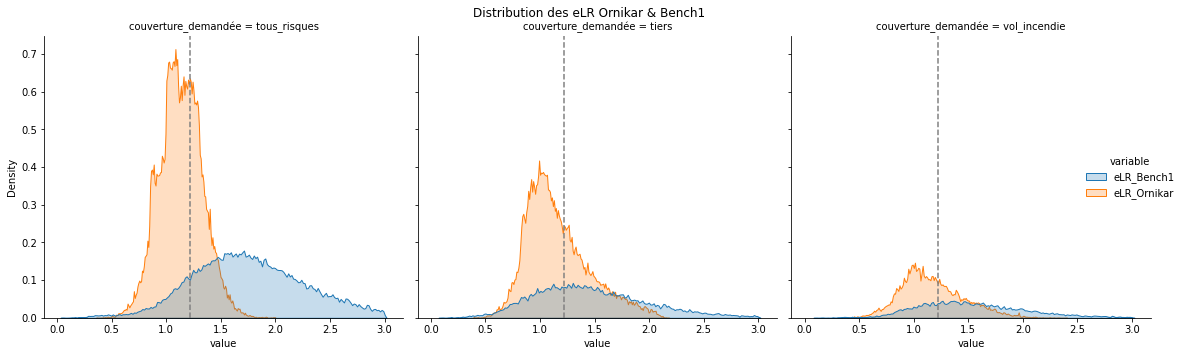

In [34]:
GraphicStatLibrary = reload(GraphicStatLibrary)
''' graph_cover itere sur la variable variableTest (1 graphe par modalité) et présente les différentes variables d'analyse en "hue"
Stat : sort moyenne des variables d'analyse
NbreCondition = 
0 : tout est graphé
1 : retire les LR au dessus de 300% ; 
2 : retire les primes au dessus de 3000 Euros
'''
#tiers,vol_incendie, tous_risques
# une ancienne version peut être appelée : 
#for label, row in dico_couv.iterrows():
#GraphicStatLibrary.graph_coverOld(DonnesLeFuretUniqueWakam, variableAnalyse = ['eLR_Bench1', 'eLR_Ornikar'], variableTest = 'couverture_demandée', ModaliteTest = label, title = "Distribution des eLR Ornikar & Bench1 sur la formule ",Stat = True)

GraphicStatLibrary.graph_cover(DonnesLeFuretUniqueWakam, variableAnalyse = ['eLR_Bench1', 'eLR_Ornikar'], variableTest = 'couverture_demandée',  title = "Distribution des eLR Ornikar & Bench1",Stat = False,Nbrecondition=1)


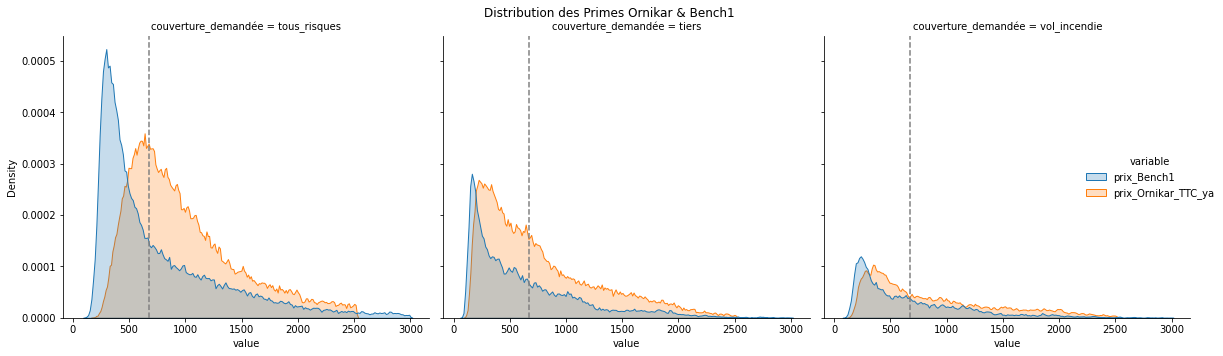

In [35]:

GraphicStatLibrary.graph_cover(DonnesLeFuretUniqueWakam, variableAnalyse = ['prix_Bench1', 'prix_Ornikar_TTC_ya'], variableTest = 'couverture_demandée',  title = "Distribution des Primes Ornikar & Bench1",Stat = False,Nbrecondition=2)

 

## 6. Lien entre Base GuideWire et LeFuret

In [36]:
LinkQuotations = reload(LinkQuotations)
''' 
OutputModalitiestoExcel : sort sur Excel toutes les modalités des variables de la table df et de la table df2. 
Cela permet d'analyser les modalités sous excel. Utile ! Mettre SortieExcelComplete = True, car sinon cela prend 3 mn de calcul pas forcément utile à chaque fois
'''
#LinkQuotations.OutputModalitiestoExcel(df=DonnesLeFuretUniqueWakam,BASE_PATH=BASE_PATH_RES,df2=BaseQuotation, fileVariableList = 'ListeVariable', fileModalite='ListeVariableModelite',SortieExcelComplete = True)
#LinkQuotations.OutputModalitiestoExcel(df=DonnesLeFuretUniqueWakam,BASE_PATH=BASE_PATH_RES,df2=BaseQuotation, fileVariableList = 'ListeVariable', fileModalite='ListeVariableModelite',SortieExcelComplete = False)
LinkQuotations.OutputModalitiestoExcel(df=DonnesLeFuretUniqueWakam,BASE_PATH=BASE_PATH_RES,df2=dfFormatLL, fileVariableList = 'ListeVariable', fileModalite='ListeVariableModelite',SortieExcelComplete = False)


In [37]:
# Lecture de la table de correspondance entre vairable Ornikar et le furet
# code utile pour vérifier existence d'une variable commençant par Position : [col for col in DonnesLeFuretUniqueWakam.columns if col.startswith('Position')]
# Mettre Stat = True pour avoir la totalité des liens par variables, en particulier si des modalités sont dans une base et pas dans l'autre.

LinkQuotations = reload(LinkQuotations)

#il manque Position_Ornikar qui n'est pas pour l'instant calculé
VariableAGarderLeFuret = ['custom_qr_id','NbreQuote','Top5_Wakam','prix_Ornikar_TTC_ya','PP_Ornikar', 'ecart_euros_Bench1'	,'eLR_Ornikar']

VariableAGarderGW = ['policy_id','online_offline' ]
#BaseComplete,ListeVariableQuotation,VariablesAtraiterOneHot,VariablesAtraiterOrdinal = LinkQuotations.PrepareLinkLeFuret(dfGW = BaseQuotation , dfLF =DonnesLeFuretUniqueWakam , BASE_PATH=BASE_PATH_RES,Stat = True,VariableAGarderLeFuret = VariableAGarderLeFuret,VariableAGarderGW=VariableAGarderGW )

BaseComplete,ListeVariableQuotation,VariablesAtraiterOneHot,VariablesAtraiterOrdinal = LinkQuotations.PrepareLinkLeFuret(dfGW = dfFormatLL , dfLF =DonnesLeFuretUniqueWakam , BASE_PATH=BASE_PATH_RES,Stat = False,VariableAGarderLeFuret = VariableAGarderLeFuret,VariableAGarderGW=VariableAGarderGW )



ListeVariableQuotation
['md_license_country', 'md_date_crm_50', 'md_crm_coefficient', 'is_claims', 'md_marital_status', 'md_occupation', 'md_property_owner_type', 'vh_financing_method', 'vh_brand', 'vh_model', 'vh_fiscal_power', 'md_code_departement', 'vh_annual_km', 'vh_parking_safety', 'vh_usage', 'md_age', 'md_license_duration', 'sd_age', 'vh_age']
Output Database with 353274 lines and 489 Columns


### Appariement par Plus proche voisin

In [38]:
 
 %matplotlib inline


GraphicStatLibrary = reload(GraphicStatLibrary)

#display(DonneesLeFuretWakamQuoteRetraite) 
#display(BaseQuotation[ListeVariableQuotation])
''' Df=BaseComplete, SortieGraphe = False, NbreAxeACP = 20,NbreVoisins=20,VariablesProchesVoisins=ListeVariableQuotation,
CasTest=0,VariablesAtraiterOneHot=VariablesAtraiterOneHot,VariablesAtraiterOrdinal=VariablesAtraiterOrdinal,SortieGraphe=True)
    dfGW = BaseQuotation , dfLF =DonnesLeFuretUniqueWakam  : pas besoin pour le processus mais permet de sortir des fichiers dfGW et dfLF avec les axes de l'ACP

    Test = True : print one line with its k neighbours
'''
IndicesPlusProchesVoisins, ResultACP,BaseQuotationACP, BaseFuretACP = GraphicStatLibrary.AppariementACPPlusProcheVoisin(
    df=BaseComplete,
    dfGW = dfFormatLL , #    dfGW = BaseQuotation ,
    dfLF =DonnesLeFuretUniqueWakam ,
    VariablesProchesVoisins=ListeVariableQuotation,
    VariablesAtraiterOrdinal=VariablesAtraiterOrdinal,
    VariablesAtraiterOneHot=VariablesAtraiterOneHot,
    ListeVariableQuotation=ListeVariableQuotation, SortieGraphe = False)
#IndicesPlusProchesVoisins, ResultACP = AppariementACPPlusProcheVoisin(VariablesProchesVoisins=['vh_circulation_date_T'],VariablesAtraiterOneHot=[],VariablesAtraiterOrdinal=['vh_circulation_date_T'])



cas Test BaseQuotation


,md_license_country,md_date_crm_50,md_crm_coefficient,is_claims,md_marital_status,md_occupation,md_property_owner_type,vh_financing_method,vh_brand,vh_model,vh_fiscal_power,md_code_departement,vh_annual_km,vh_parking_safety,vh_usage,md_age,md_license_duration,sd_age,vh_age
0,French driving license,100.0,1,0,Married,Salarié,Lease,Cash,CITROEN,C4 II,6,93.0,12000,Street or public parking,Leisure,31,8,NaN,8


cas Test plus proche voisin BaseFuret


,md_license_country,md_date_crm_50,md_crm_coefficient,is_claims,md_marital_status,md_occupation,md_property_owner_type,vh_financing_method,vh_brand,vh_model,vh_fiscal_power,md_code_departement,vh_annual_km,vh_parking_safety,vh_usage,md_age,md_license_duration,sd_age,vh_age
351693,French driving license,100.0,51,1,Married,Entrepreneur / Chef d'entreprise,Owner,Cash,FORD,FOCUS,6,33.0,11000,Garage or parking wiht a private lot,Leisure,32,12,NaN,9
328519,French driving license,100.0,51,0,Domestic partner,Salarié,Owner,Cash,RENAULT,SCENIC III,5,11.0,12000,Collective covered parking,Leisure and occasional professional use,32,12,NaN,7
323046,French driving license,100.0,51,0,Domestic partner,Salarié,Owner,Cash,RENAULT,SCENIC III,5,11.0,12000,Collective covered parking,Leisure and occasional professional use,32,12,NaN,7
251507,French driving license,100.0,51,0,Single,Salarié,Owner,Cash,PEUGEOT,208,5,44.0,14000,Garage or parking wiht a private lot,Leisure and occasional professional use,31,12,NaN,8
215427,French driving license,100.0,51,0,Single,divers,Lease,Cash,FORD,FIESTA,5,31.0,9000,Garage or parking wiht a private lot,Leisure,32,12,NaN,8
235208,French driving license,100.0,50,0,Single,Salarié,Lease,Cash,RENAULT,SCENIC III,7,75.0,14000,Street or public parking,Leisure and occasional professional use,33,13,NaN,8
277425,French driving license,100.0,51,1,Single,Salarié,Lease,Inconnu,SEAT,ARONA,6,51.0,14000,Street or public parking,Leisure,31,12,NaN,5
282395,French driving license,100.0,51,0,Domestic partner,Salarié,Owner,Inconnu,VOLKSWAGEN,PASSAT,6,57.0,13000,Garage or parking wiht a private lot,Leisure and occasional professional use,31,13,NaN,8
308893,French driving license,10001.0,50,1,Domestic partner,Salarié,Owner,Inconnu,PEUGEOT,308,6,49.0,12000,Garage or parking wiht a private lot,Leisure and occasional professional use,31,13,NaN,6
344532,French driving license,100.0,51,0,Single,divers,Lease,Inconnu,PEUGEOT,2008,5,84.0,11000,Street or public parking,Leisure,31,13,NaN,10


In [39]:
# Add to GW base the average of the variables of LF neighbour (done with AppariementACPPlusProcheVoisin)
GraphicStatLibrary = reload(GraphicStatLibrary)
BaseQuotationavecFuret=GraphicStatLibrary.AddLeFuretIndicators(dfGW=BaseQuotationACP, dfLF=BaseFuretACP, IndicesPlusProchesVoisins=IndicesPlusProchesVoisins,Stat=True)

ligne/colonne: 177078 20


C:\Users/guill/GitHub/2023 Ornikar Pricing/pricing-insurance/Python Official Library\GraphicStatLibrary.py:259: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ligne'] = mat[0,:]


In [40]:

### Export en csv
BaseFuretACP.to_csv(f'{BASE_PATH_RES}/DonneesLeFuretWakamQuoteRetraiteACP.csv',sep=',')

In [41]:

# Ajout des variables TrainTest (random) et WeekAkur8 (à partir de variableDate mis en format Week depuis le début de l'activité d'ornikar)
BaseQuotationavecFuret = GraphicStatLibrary.AjoutVariableAkur8(df=BaseQuotationavecFuret,variableDate='submission_created_at',test_size=0.2,Stat=True)


Stat
distribution of TrainTest Variable


,TrainTest
True,141531
False,35798


distribution of WeekAkur8


,WeekAkur8
0.0,616
1.0,2290
2.0,5231
3.0,6280
4.0,5796
5.0,5910
6.0,6470
7.0,6369
8.0,26660
9.0,48389
